In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import scipy
from datetime import datetime, timedelta
import urllib2
from StringIO import StringIO
from PIL import Image

20160816 Tuesday 229


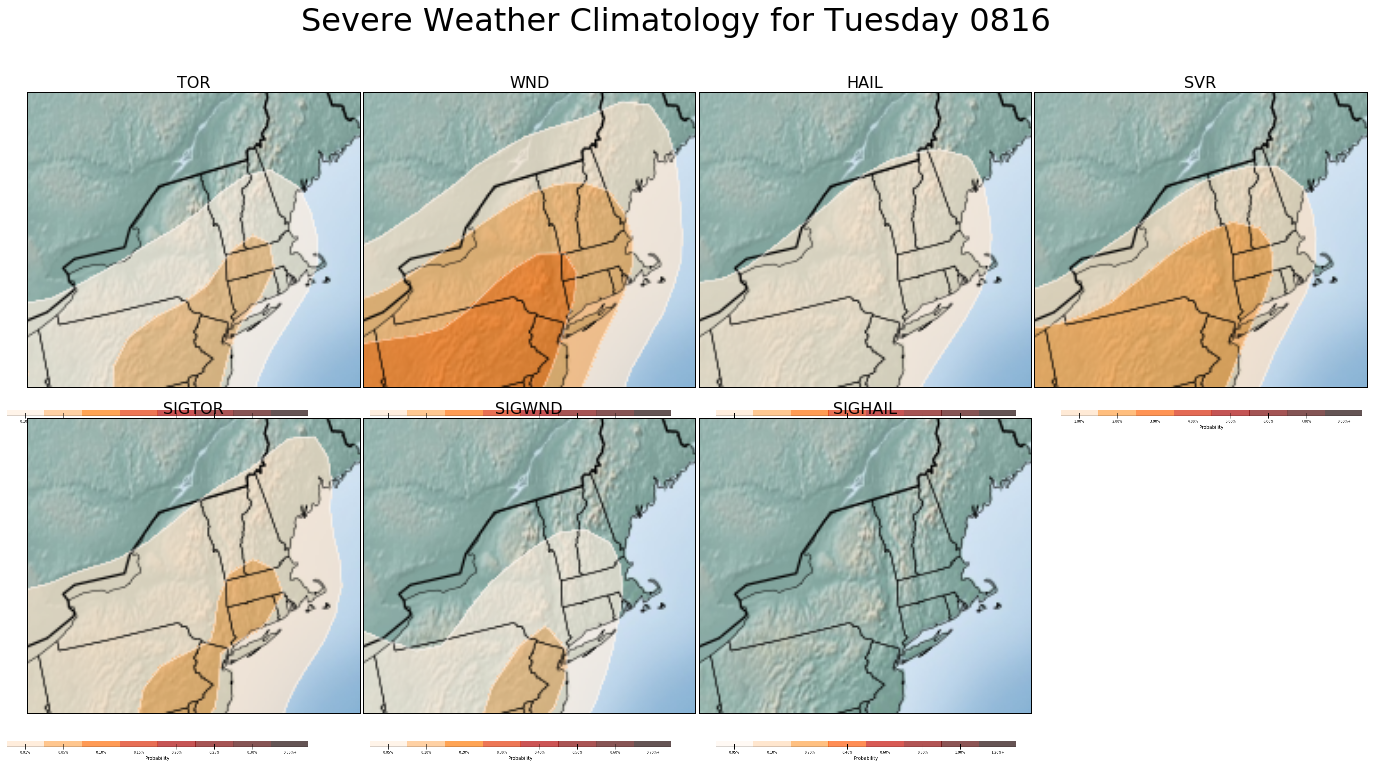

In [4]:
#todays climo
dd = datetime.utcnow().strftime('%Y%m%d')
da = datetime.utcnow().strftime('%A')
ju = datetime.utcnow().strftime('%j')
print(dd,da,ju)

ddd = datetime.utcnow().strftime('%m%d')

dm = ['http://www.spc.noaa.gov/misc/climographics/']*7
dm.append('http://www.spc.noaa.gov/new/images/')
typ = ['all_torn/'+ju+'.png','all_wind/'+ju+'.png','all_hail/'+ju+'.png','any_severe/'+ju+'.png',
       'sig_torn/'+ju+'.png','sig_wind/'+ju+'.png','sig_hail/'+ju+'.png']#,
       #'Outlook-category-descriptions.png']
mask = [1]*8
labels = ['TOR','WND','HAIL','SVR','SIGTOR','SIGWND','SIGHAIL','DESC','']
xpos = [.05,.26,.46,.66,.05,.26,.46,.66]
ypos = [.51,.51,.51,.51,.05,.05,.05,.05]

img_locations = [] #prob also
for i in range(0,len(typ)):
    img_locations.append(dm[i]+typ[i])
#print(img_locations)

fig = figure(figsize=(24,10)) #choose wisely otherwise you bake in x-axis whitespace
zoom = True

#loop through all file locations
for i in range(len(img_locations)):
    ##read in image
    try:
        img_data = urllib2.urlopen(img_locations[i]).read()
    except:
        img_data = 0
        print('Failed')
    if img_data != 0:
        img = Image.open(StringIO(img_data))
        #cropping
        width, height = img.size   # Get dimensions
        #print(img.size)
        region = 'M'
        # focus on the southeast region ;; need a function for this
        if region == 'SE':
            xx = 5
            yy = 2
            xy = 5
            yx = 1
            xa = 4.15
        else:
            xx = 5
            yy = 2.
            xy = 4.75
            yx = 1.55
            xa = 4.25
            
            yy = 3.75
            xy = 4.75
            yx = .5
            xa = 1.75
        if yy >= xy: print('Wrong:')
        left = int(yy*width/xx)
        top = int(yx*height/xx)
        right = int(xy*width/xx)
        bottom = int(xa*height/xx)
        #print(left,top,right,bottom)
        if zoom:
            imgcrop = img.crop((left, top, right, bottom))
        else:
            imgcrop = img
        ##set current subplot to i
        ##subplot shape will be in this case
        ##(2,2,i) where i is the current subplot
        ax = plt.subplot(2,4,i+1)
        ##show image
        plt.imshow(imgcrop)#,vmin=0,vmax=16)
        if i < 8:
            plt.title(labels[i],fontsize=16)
        #ax.text(0.025,0.875,titles[i],fontsize=13,transform=ax.transAxes)
        #ax.axis('off')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        leg = True
        if leg:
            axa = fig.add_axes([xpos[i], ypos[i], 0.3, 0.03])
            imgcrop = img.crop((int(.01*width), int(.9*height),int(.99*width) , int(.999*height)))
            plt.imshow(imgcrop)#,vmin=0,vmax=16)
            axa.set_yticklabels([])
            axa.set_xticklabels([])
            axa.set_xticks([])
            axa.set_yticks([])
            axa.axis('off')
    else:
        ax = plt.subplot(2,4,i+1)
        ax.text(0,0.7,'Missing',fontsize=20,transform=ax.transAxes)
        ax.axis('off')
        print('Missing: ',titles[i])
#plt.tight_layout(pad=.5, h_pad=None, w_pad=None, rect=None)
plt.subplots_adjust(wspace=0.01, hspace=0.01, top=1, bottom=0.1)
suptitle('Severe Weather Climatology for '+da + ' '+ddd,fontsize=32,y=1.1)

savefig("today.png",dpi=300,bbox_inches="tight")

# 4 day sequence of outlooks

In [19]:
dd = datetime.utcnow().strftime('%Y%m%d')
ac = datetime.utcnow().strftime('%H%M')
yy = datetime.utcnow().strftime('%Y')
ltim = []
yr = []
for h in [0,0,0,0,24,24,24,24,48,48,48,48]:
    ddb = datetime.utcnow() - timedelta(hours=h)
    ltim.append(ddb.strftime('%Y%m%d'))
    yr.append(ddb.strftime('%Y'))
    
cc = datetime.utcnow() + timedelta(hours=48)
c = cc.strftime('%A')
dd = datetime.utcnow() + timedelta(hours=72)
d = dd.strftime('%A')
print(len(ltim),len(yr))

if float(ac) >= 600 and float(ac) < 1250:
    aa = '1200'
    bb = '0600'
elif float(ac) >= 1250 and float(ac) < 1630:
    aa = '1300'
    bb = '0600'
elif float(ac) >= 1630 and float(ac) < 2000:
    aa = '1630'
    bb = '1730'
elif float(ac) >= 2000:
    aa = '2000'
    bb = '1730'
else:
    aa = '0100'
    bb = '1730'
print(dd,ac,aa)
titles = ['Day1_'+aa,'Day2_'+bb,'Day3','Day4','Day2','Day3','Day4','Day5','Day3','Day4','Day5','Day6']
labels = ['Today','Tomorrow',c,d]
out = ["/day1otlk_","/day2otlk_","/day3prob_","/day4prob_","/day2otlk_","/day3prob_","/day4prob_","/day5prob_","/day3prob_","/day4prob_","/day5prob_","/day6prob_"]
out = ["/day1otlk_","/day2otlk_","/day3otlk_","/day4prob_","/day2otlk_","/day3otlk_","/day4prob_","/day5prob_","/day3otlk_","/day4prob_","/day5prob_","/day6prob_"]
ext = ['','','_prt','','','_prt','','','_prt','','','']
ext = ['','','','','','','','','','','','']
pt = ["_"+aa,"_"+bb,'_0730',"_1200",'_1730','_0730',"_1200","_1200","_0730","_1200","_1200","_1200"]
pt = ["_"+aa,"_"+bb,'_0730',"_1200",'_1730','_0730',"_1200","_1200","_0730","_1200","_1200","_1200"]
dn = "http://www.spc.noaa.gov/products/exper/day4-8/archive/"
dm = "http://www.spc.noaa.gov/products/outlook/archive/"
dr = [dm,dm,dm,dn,dm,dm,dn,dn,dm,dn,dn,dn]

print(len(ltim),len(yr),len(titles))
print(len(out),len(ext),len(pt),len(dr))


12 12
2016-09-08 15:37:05.987368 1537 1300
12 12 12
12 12 12 12


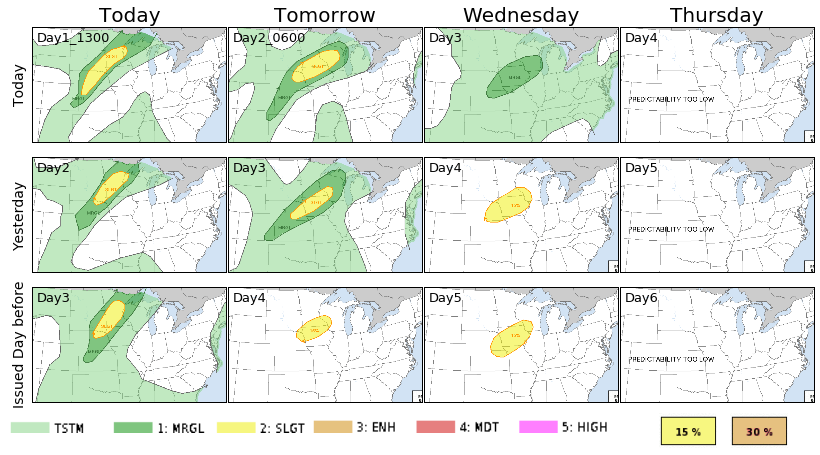

In [20]:
img_locations = [] #prob also
for i in range(0,12):
    img_locations.append(dr[i]+yr[i]+out[i]+ltim[i]+pt[i]+ext[i]+".gif")
#print(img_locations)

fig = figure(figsize=(14,6)) #choose wisely otherwise you bake in x-axis whitespace
zoom = True

#loop through all file locations
for i in range(len(img_locations)):
    ##read in image
    try:
        img_data = urllib2.urlopen(img_locations[i]).read()
    except:
        img_data = 0
    if img_data != 0:
        img = Image.open(StringIO(img_data))
        if i == 1: imga = img
        if i == 3: imgb = img
        #cropping
        width, height = img.size   # Get dimensions
        #print(img.size)
        region = 'M'
        # focus on the southeast region ;; need a function for this
        if region == 'SE':
            xx = 5
            yy = 2
            xy = 5
            yx = 1
            xa = 4.15
        elif region == 'CE':
            xx = 5
            yy = 1.75#1
            xy = 4.
            yx = 1.5
            xa = 4.25
        else:
            xx = 5
            yy = 1.25
            xy = 4.7
            yx = .5
            xa = 3.5
        if yy >= xy: print('Wrong:')
        left = int(yy*width/xx)
        top = int(yx*height/xx)
        right = int(xy*width/xx)
        bottom = int(xa*height/xx)
        #print(left,top,right,bottom)
        if zoom:
            imgcrop = img.crop((left, top, right, bottom))
        else:
            imgcrop = img
        ##set current subplot to i
        ##subplot shape will be in this case
        ##(2,2,i) where i is the current subplot
        ax = plt.subplot(3,len(img_locations)/3,i+1)
        ##show image
        plt.imshow(imgcrop)#,vmin=0,vmax=16)
        if i < 4:
            plt.title(labels[i],fontsize=20)
        if i == 0:
            ylabel('Today',fontsize=14)
        elif i == 4:
            ylabel('Yesterday',fontsize=14)
        elif i == 8:
            ylabel('Issued Day before',fontsize=14)
        ax.text(0.025,0.875,titles[i],fontsize=13,transform=ax.transAxes)
        #ax.axis('off')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax = plt.subplot(3,4,i+1)
        ax.text(0,0.7,'Missing',fontsize=20,transform=ax.transAxes)
        ax.axis('off')
        print('Missing: ',titles[i],img_locations[i])
#plt.tight_layout(pad=.5, h_pad=None, w_pad=None, rect=None)
plt.subplots_adjust(wspace=0.01, hspace=0.01, top=1, bottom=0.1)
if zoom:
    axa = fig.add_axes([0.1, 0.01, 0.3, 0.1])
    imgcrop = imga.crop((int(.7*width), int(.9475*height),int(.99*width) , int(.9675*height)))
    plt.imshow(imgcrop)#,vmin=0,vmax=16)
    axb = fig.add_axes([0.4, 0.01, 0.3, 0.1])
    imgcrop = imga.crop((int(.7*width), int(.975*height),int(.99*width) , int(.995*height)))
    plt.imshow(imgcrop)#,vmin=0,vmax=16)
    axc = fig.add_axes([0.7, 0.01, 0.15, 0.08])
    imgcrop = imgb.crop((int(.9125*width), int(.9025*height),int(.99*width) , int(.97*height)))
    plt.imshow(imgcrop)#,vmin=0,vmax=16)
    axd = fig.add_axes([0.77, 0.01, 0.15, 0.08])
    imgcrop = imgb.crop((int(.9125*width), int(.8125*height),int(.99*width) , int(.88*height)))
    plt.imshow(imgcrop)#,vmin=0,vmax=16)
    
    axa.set_yticklabels([])
    axa.set_xticklabels([])
    axa.set_xticks([])
    axa.set_yticks([])
    axb.set_yticklabels([])
    axb.set_xticklabels([])
    axb.set_xticks([])
    axb.set_yticks([])
    axc.set_yticklabels([])
    axc.set_xticklabels([])
    axc.set_xticks([])
    axc.set_yticks([])
    axd.set_yticklabels([])
    axd.set_xticklabels([])
    axd.set_xticks([])
    axd.set_yticks([])
    axa.axis('off')
    axb.axis('off')
    axc.axis('off')
    axd.axis('off')
savefig(ltim[0]+".png",dpi=300,bbox_inches="tight")

# 5 day sequence of outlooks

In [8]:
dd = datetime.utcnow().strftime('%Y%m%d')
ac = datetime.utcnow().strftime('%H%M')
yy = datetime.utcnow().strftime('%Y')
ltim = []
yr = []
for h in [0,0,0,0,0,24,24,24,24,24,48,48,48,48,48]:
    ddb = datetime.utcnow() - timedelta(hours=h)
    ltim.append(ddb.strftime('%Y%m%d'))
    yr.append(ddb.strftime('%Y'))
    
cc = datetime.utcnow() + timedelta(hours=48)
c = cc.strftime('%A')
dd = datetime.utcnow() + timedelta(hours=72)
d = dd.strftime('%A')
ee = datetime.utcnow() + timedelta(hours=96)
e = ee.strftime('%A')
print(len(ltim),len(yr))

if float(ac) >= 600 and float(ac) < 1300:
    aa = '1200'
    bb = '0600'
elif float(ac) >= 1300 and float(ac) < 1630:
    aa = '1300'
    bb = '0600'
elif float(ac) >= 1630 and float(ac) < 2000:
    aa = '1630'
    bb = '1730'
elif float(ac) >= 2000:
    aa = '2000'
    bb = '1730'
else:
    aa = '0100'
    bb = '1730'
print(dd,ac,aa)
titles = ['Day1_'+aa,'Day2_'+bb,'Day3','Day4','Day5','Day2','Day3','Day4','Day5','Day6','Day3','Day4','Day5','Day6','Day 7']
labels = ['Today','Tomorrow',c,d,e]
out = ["/day1otlk_","/day2otlk_","/day3prob_","/day4prob_","/day5prob_","/day2otlk_","/day3prob_","/day4prob_","/day5prob_","/day6prob_","/day3prob_","/day4prob_","/day5prob_","/day6prob_","/day7prob_"]
out = ["/day1otlk_","/day2otlk_","/day3otlk_","/day4prob_","/day5prob_","/day2otlk_","/day3otlk_","/day4prob_","/day5prob_","/day6prob_","/day3otlk_","/day4prob_","/day5prob_","/day6prob_","/day7prob_"]
ext = ['','','_prt','','','','_prt','','','','_prt','','','','']
ext = ['','','','','','','','','','','','','','','']
pt = ["_"+aa,"_"+bb,'_0730',"_1200","_1200",'_1730','_0730',"_1200","_1200","_1200","_0730","_1200","_1200","_1200","_1200"]
dn = "http://www.spc.noaa.gov/products/exper/day4-8/archive/"
dm = "http://www.spc.noaa.gov/products/outlook/archive/"
dr = [dm,dm,dm,dn,dn,dm,dm,dn,dn,dn,dm,dn,dn,dn,dn]

print(len(ltim),len(yr),len(titles))
print(len(out),len(ext),len(pt),len(dr))

15 15
2016-09-07 13:06:01.552848 1306 1300
15 15 15
15 15 15 15


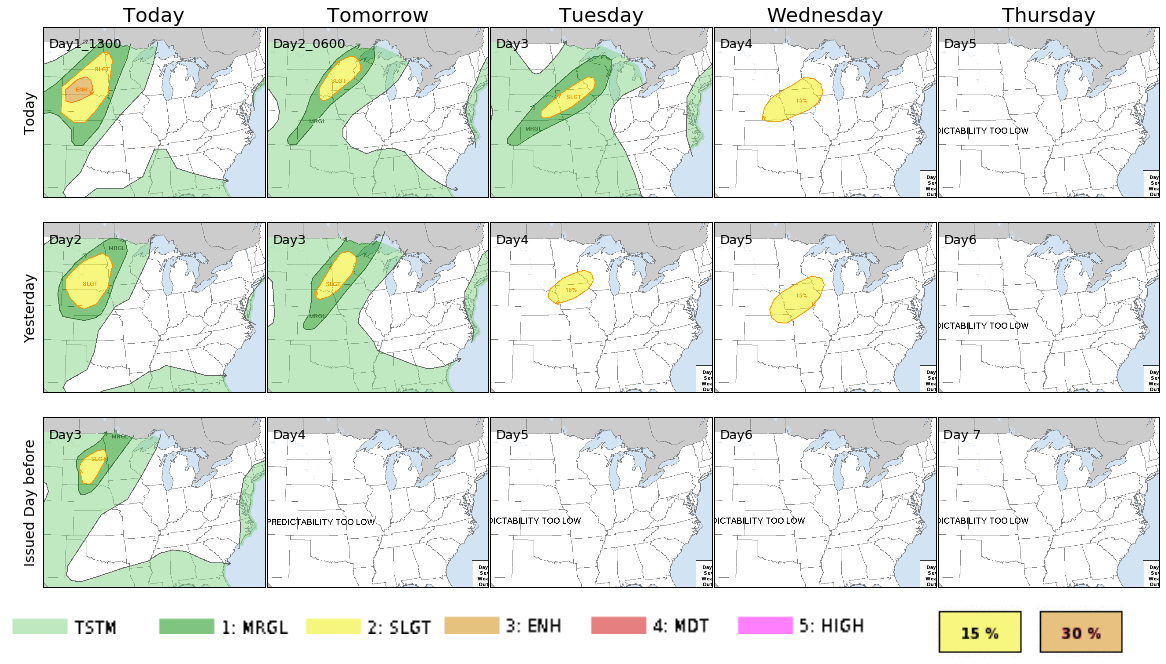

In [9]:
img_locations = [] #prob also
for i in range(0,len(dr)):
    img_locations.append(dr[i]+yr[i]+out[i]+ltim[i]+pt[i]+ext[i]+".gif")
#print(img_locations)

fig = figure(figsize=(20,9)) #choose wisely otherwise you bake in x-axis whitespace
zoom = True

#loop through all file locations
for i in range(len(img_locations)):
    ##read in image
    try:
        img_data = urllib2.urlopen(img_locations[i]).read()
    except:
        img_data = 0
    if img_data != 0:
        img = Image.open(StringIO(img_data))
        if i == 1: imga = img
        if i == 3: imgb = img
        #cropping
        width, height = img.size   # Get dimensions
        #print(img.size)
        region = 'M'
        # focus on the southeast region ;; need a function for this
        if region == 'SE':
            xx = 5
            yy = 2
            xy = 5
            yx = 1
            xa = 4.15
        elif region == 'CE':
            xx = 5
            yy = 1.75#1
            xy = 4.
            yx = 1.5
            xa = 4.25
        elif region == 'CE2':
            xx = 5
            yy = 2#1
            xy = 4.2
            yx = 1.2
            xa = 4.15
        else:
            xx = 5
            yy = 1.65
            xy = 4.75
            yx = .25
            xa = 3.75

        if yy >= xy: print('Wrong:')
        left = int(yy*width/xx)
        top = int(yx*height/xx)
        right = int(xy*width/xx)
        bottom = int(xa*height/xx)
        #print(left,top,right,bottom)
        if zoom:
            imgcrop = img.crop((left, top, right, bottom))
        else:
            imgcrop = img
        ##set current subplot to i
        ##subplot shape will be in this case
        ##(2,2,i) where i is the current subplot
        ax = plt.subplot(3,len(img_locations)/3,i+1)
        ##show image
        plt.imshow(imgcrop)#,vmin=0,vmax=16)
        if i < 5:
            plt.title(labels[i],fontsize=20)
        if i == 0:
            ylabel('Today',fontsize=14)
        elif i == 5:
            ylabel('Yesterday',fontsize=14)
        elif i == 10:
            ylabel('Issued Day before',fontsize=14)
        ax.text(0.025,0.875,titles[i],fontsize=13,transform=ax.transAxes)
        #ax.axis('off')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax = plt.subplot(3,4,i+1)
        ax.text(0,0.7,'Missing',fontsize=20,transform=ax.transAxes)
        ax.axis('off')
        print('Missing: ',titles[i])
if zoom:
    axa = fig.add_axes([0.1, 0.01, 0.3, 0.1])
    imgcrop = imga.crop((int(.7*width), int(.9475*height),int(.99*width) , int(.9675*height)))
    plt.imshow(imgcrop)#,vmin=0,vmax=16)
    axb = fig.add_axes([0.4, 0.01, 0.3, 0.1])
    imgcrop = imga.crop((int(.7*width), int(.975*height),int(.99*width) , int(.995*height)))
    plt.imshow(imgcrop)#,vmin=0,vmax=16)
    axc = fig.add_axes([0.7, 0.01, 0.15, 0.08])
    imgcrop = imgb.crop((int(.9125*width), int(.9025*height),int(.99*width) , int(.97*height)))
    plt.imshow(imgcrop)#,vmin=0,vmax=16)
    axd = fig.add_axes([0.77, 0.01, 0.15, 0.08])
    imgcrop = imgb.crop((int(.9125*width), int(.8125*height),int(.99*width) , int(.88*height)))
    plt.imshow(imgcrop)#,vmin=0,vmax=16)
    
    axa.set_yticklabels([])
    axa.set_xticklabels([])
    axa.set_xticks([])
    axa.set_yticks([])
    axb.set_yticklabels([])
    axb.set_xticklabels([])
    axb.set_xticks([])
    axb.set_yticks([])
    axc.set_yticklabels([])
    axc.set_xticklabels([])
    axc.set_xticks([])
    axc.set_yticks([])
    axd.set_yticklabels([])
    axd.set_xticklabels([])
    axd.set_xticks([])
    axd.set_yticks([])
    axa.axis('off')
    axb.axis('off')
    axc.axis('off')
    axd.axis('off')
#plt.tight_layout(pad=.5, h_pad=None, w_pad=None, rect=None)
plt.subplots_adjust(wspace=0.01, hspace=0.01, top=1, bottom=0.1)
savefig(ltim[0]+".png",dpi=300,bbox_inches="tight")

# todays outlook progression

In [5]:
def tables(tbls,cats):
    #tbls = "http://www.spc.noaa.gov/products/outlook/ac1torn_2000_SItable.html"
    ctext = urllib2.urlopen(tbls).readlines()

    labs = []
    if cats == 'cats': 
        nams = ['HIGH','MODERATE','ENHANCED','SLIGHT','MARGINAL']
        labs = ['HIGH','MDT','ENH','SLGT','MRGL']
        kins = [4,8,8,6,8]
    if cats == 'torn': 
        nams = ['60','45','30','15','10','5','2']
        kins = [2,2,2,2,2,1,1]
        for q in nams:
            labs.append(q+'%')
    if cats == 'wind' or cats == 'hail': 
        nams = ['60','45','30','15','5']
        kins = [2,2,2,2,1]
        for q in nams:
            labs.append(q+'%')

    risk,pops,ars = [],[],[]
    for j,i in enumerate(ctext):
        ct = i.split("class='impacts'>")
        if len(ct) > 1:
            for q,k in enumerate(nams):
                #print(ct[1][0:kins[q]])
                if ct[1][0:kins[q]+1] == k+'&' and cats != 'cats':
                    risk.append(labs[q])
                    fc = ctext[j+1].split("class='impacts'>")
                    if len(fc) > 1:
                        fd = fc[1].split('<')
                        ars.append(fd[0])
                    fc = ctext[j+2].split("class='impacts'>")
                    if len(fc) > 1:
                        fd = fc[1].split('<')
                        pops.append(fd[0])
                if ct[1][0:kins[q]] == k and cats == 'cats':
                    risk.append(labs[q])
                    fc = ctext[j+1].split("class='impacts'>")
                    if len(fc) > 1:
                        fd = fc[1].split('<')
                        ars.append(fd[0])
                    fc = ctext[j+2].split("class='impacts'>")
                    if len(fc) > 1:
                        fd = fc[1].split('<')
                        pops.append(fd[0])
    return risk,ars,pops

In [6]:
dd = datetime.utcnow().strftime('%Y%m%d')
ac = datetime.utcnow().strftime('%H%M')
yy = datetime.utcnow().strftime('%Y')

ltim = []
yr = []

if float(ac) >= 1300 and float(ac) < 1600:
    aa = '1300'
    bb = '1200'
    npanels = 2
    pt = ["_"+aa,"_"+aa,'_'+aa,"_"+aa,'_'+bb,'_'+bb,"_"+bb,"_"+bb]
    ylabels = ['8am','Issued 1am']
    #ylabels = ['7am','Issued 12am']
elif float(ac) >= 1600 and float(ac) < 1940:
    aa = '1630'
    bb = '1300'
    cc = '1200'
    npanels = 3
    pt = ["_"+aa,"_"+aa,'_'+aa,"_"+aa,'_'+bb,'_'+bb,"_"+bb,"_"+bb,"_"+cc,"_"+cc,"_"+cc,"_"+cc]
    ylabels = ['1130am','8am','Issued 1am']
    #ylabels = ['1030am','7am','Issued 12am']
elif float(ac) >= 1940 and float(ac) < 2500:
    aa = '2000'
    bb = '1630'
    cc = '1300'
    ee = '1200'
    pt = ["_"+aa,"_"+aa,'_'+aa,"_"+aa,'_'+bb,'_'+bb,"_"+bb,"_"+bb,"_"+cc,"_"+cc,"_"+cc,"_"+cc,"_"+ee,"_"+ee,"_"+ee,"_"+ee]
    ylabels = ['3pm','1130am','8am','Issued 1am']
    #ylabels = ['2pm','1030am','7am','Issued 12am']
    npanels = 4
else:
    aa = '0100'
    bb = '2000'
    cc = '1630'
    ee = '1300'
    ff = '1200'
    pt = ["_"+aa,"_"+aa,'_'+aa,"_"+aa,'_'+bb,'_'+bb,"_"+bb,"_"+bb,"_"+cc,"_"+cc,"_"+cc,"_"+cc,"_"+ee,"_"+ee,"_"+ee,"_"+ee,"_"+ff,"_"+ff,"_"+ff,"_"+ff]
    ylabels = ['8pm','3pm','1130am','8am','Issued 1am']
    #ylabels = ['7pm','2pm','1030am','7am','Issued 12am']
    npanels = 5
    
for q,h in enumerate([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]):
    if q > 3:
        ddb = datetime.utcnow() - timedelta(hours=h) - timedelta(hours=3)
    else:
        ddb = datetime.utcnow() - timedelta(hours=h)
    ltim.append(ddb.strftime('%Y%m%d'))
    yr.append(ddb.strftime('%Y'))
print(ddb,ac,aa)    

titles = ['CAT','TOR','HAIL','WIND']*npanels
#labels = ['Today','Tomorrow',c,d]
out = ["/day1otlk_","/day1probotlk_","/day1probotlk_","/day1probotlk_"]*npanels
ext = ['_prt','_torn_prt','_hail_prt','_wind_prt']*npanels

#pt = ["_1630","_1630",'_1630',"_1630",'_1300','_1300',"_1300","_1300","_1200","_1200","_1200","_1200"]
dn = "http://www.spc.noaa.gov/products/exper/day4-8/archive/"
dm = "http://www.spc.noaa.gov/products/outlook/archive/"
dr = [dm]*npanels*4

print(len(ltim),len(yr),len(titles))
print(len(out),len(ext),len(pt),len(dr))

tblCat = "http://www.spc.noaa.gov/products/outlook/ac1_"+aa+"_SItable.html"
tblTorn = "http://www.spc.noaa.gov/products/outlook/ac1torn_"+aa+"_SItable.html"
tblHail = "http://www.spc.noaa.gov/products/outlook/ac1hail_"+aa+"_SItable.html"
tblWind = "http://www.spc.noaa.gov/products/outlook/ac1wind_"+aa+"_SItable.html"


2016-08-24 17:14:40.041997 2014 2000
20 20 16
16 16 16 16


http://www.spc.noaa.gov/products/outlook/archive/2016/day1otlk_20160824_2000_prt.gif
['SLGT', 'MRGL']
['5%', '2%']
['15%', '5%']
['15%', '5%']


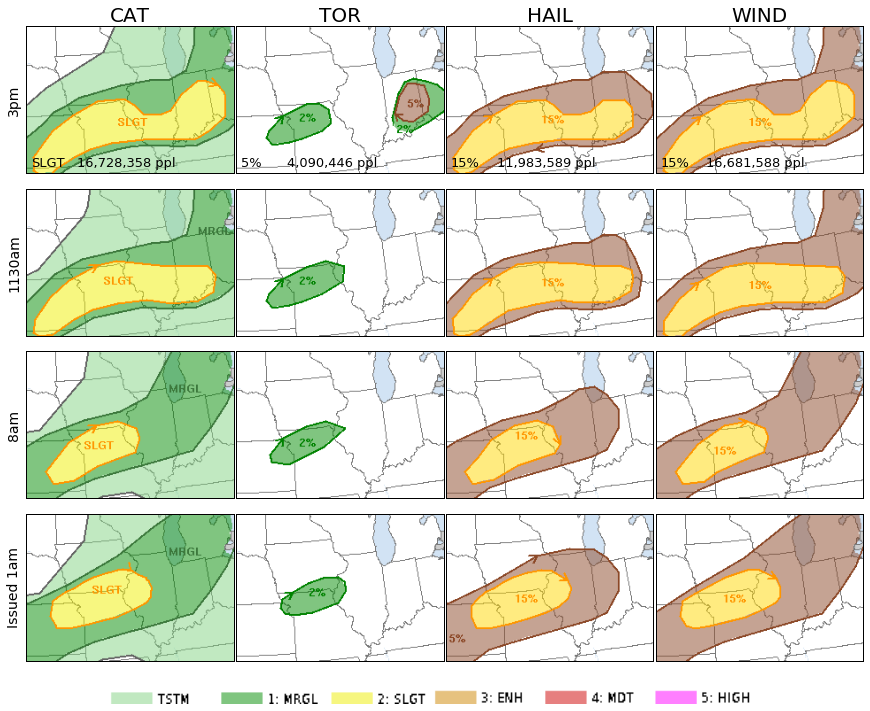

In [9]:
img_locations = [] #prob also
for i in range(0,npanels*4):
    img_locations.append(dr[i]+yr[i]+out[i]+ltim[i]+pt[i]+ext[i]+".gif")
print(img_locations[0])
# 14,6
fig = figure(figsize=(15,10)) #choose wisely otherwise you bake in x-axis whitespace
#loop through all file locations
for i in range(len(img_locations)):
    ##read in image
    try:
        img_data = urllib2.urlopen(img_locations[i]).read()
    except:
        img_data = 0
    if img_data != 0:
        img = Image.open(StringIO(img_data))
        if i == 0: imga = img
        #cropping
        width, height = img.size   # Get dimensions
        #print(img.size)
        region = 'M'
        # focus on the southeast region ;; need a function for this
        if region == 'SE':
            xx = 5
            yy = 1.5 #2
            xy = 4.1 #5
            xa = 4.75
        elif region == 'CE':
            xx = 5
            yy = 1.5#1 1.75
            xy = 4#4 3.5
            xa = 4.15
        else:
            xx = 5
            yy = 3.5
            xy = 4.85
            ya = 1.5
            xa = 3.
            #ma
            yy = 2.35
            xy = 3.8
            ya = 1.25
            xa = 2.75
        if yy >= xy: print('Wrong:')
        left = int(yy*width/xx)
        top = int(ya*height/xx)
        right = int(xy*width/xx)
        bottom = int(xa*height/xx)
        #print(left,top,right,bottom)
        imgcrop = img.crop((left, top, right, bottom))
        ##set current subplot to i
        ##subplot shape will be in this case
        ##(2,2,i) where i is the current subplot
        ax = plt.subplot(npanels,len(img_locations)/npanels,i+1)
        ##show image
        plt.imshow(imgcrop)#,vmin=0,vmax=16)
        if i < 4:
            plt.title(titles[i],fontsize=20)
        for k,q in enumerate([tblCat,tblTorn,tblHail,tblWind]):
            if k == 0: cat = 'cats'
            if k == 1: cat = 'torn'
            if k == 2: cat = 'hail'
            if k == 3: cat = 'wind'
            if i == k:
                risk,ars,pops = tables(q,cat)
                try:
                    risk,ars,pops = tables(q,cat)
                    print(risk)
                except:
                    risk,ars,pops = [],[],[]
                if len(risk) > 0:
                    crap = 0
                    ax.text(0.025,0.05,risk[0],fontsize=13,transform=ax.transAxes)
                    ax.text(0.245,0.05,pops[0]+" ppl",fontsize=13,transform=ax.transAxes)
        if i == 0:
            ylabel(ylabels[0],fontsize=14)
        elif i == 4:
            ylabel(ylabels[1],fontsize=14)
        elif i == 8:
            ylabel(ylabels[2],fontsize=14)
        elif i == 12:
            ylabel(ylabels[3],fontsize=14)
        #ax.text(0.025,0.875,titles[i],fontsize=13,transform=ax.transAxes)
        #ax.axis('off')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax = plt.subplot(npanels,4,i+1)
        ax.text(0,0.7,'Missing',fontsize=20,transform=ax.transAxes)
        ax.axis('off')
        print('Missing: ',titles[i])
#plt.tight_layout(pad=.5, h_pad=None, w_pad=None, rect=None)
plt.subplots_adjust(wspace=0.01, hspace=0.01, top=1, bottom=0.1)
#zoom on the legend and put in on here new axes instance
if zoom:
    axa = fig.add_axes([0.2, 0.01, 0.3, 0.1])
    imgcrop = imga.crop((int(.7*width), int(.9475*height),int(.99*width) , int(.9675*height)))
    plt.imshow(imgcrop)#,vmin=0,vmax=16)
    axb = fig.add_axes([0.5, 0.01, 0.3, 0.1])
    imgcrop = imga.crop((int(.7*width), int(.975*height),int(.99*width) , int(.995*height)))
    plt.imshow(imgcrop)#,vmin=0,vmax=16)
    axa.set_yticklabels([])
    axa.set_xticklabels([])
    axa.set_xticks([])
    axa.set_yticks([])
    axb.set_yticklabels([])
    axb.set_xticklabels([])
    axb.set_xticks([])
    axb.set_yticks([])
    axa.axis('off')
    axb.axis('off')
savefig(ltim[0]+"_D1.png",dpi=300,bbox_inches="tight")

In [ ]:
# day1 outlook verification

In [12]:
# verification
dd = datetime.utcnow().strftime('%Y%m%d')
ac = datetime.utcnow().strftime('%H%M')
yy = datetime.utcnow().strftime('%Y')
ltim = []
yr = []
for h in [0]*4:
    ddb = datetime.utcnow() - timedelta(hours=h)
    ltim.append(ddb.strftime('%Y%m%d'))
    yr.append(ddb.strftime('%Y'))
for h in [24]*16:
    ddb = datetime.utcnow() - timedelta(hours=h)
    ltim.append(ddb.strftime('%Y%m%d'))
    yr.append(ddb.strftime('%Y'))

aa = '0100'
bb = '2000'
cc = '1630'
ee = '1300'
ff = '1200'
pt = ["_"+aa,"_"+aa,'_'+aa,"_"+aa,'_'+bb,'_'+bb,"_"+bb,"_"+bb,"_"+cc,"_"+cc,"_"+cc,"_"+cc,"_"+ee,"_"+ee,"_"+ee,"_"+ee,"_"+ff,"_"+ff,"_"+ff,"_"+ff]
ylabels = ['8pm','3pm','1130am','8am','Issued 1am']
#ylabels = ['7pm','2pm','1030am','7am','Issued 12am']
npanels = 5
print(dd,ac,aa)    

titles = ['CAT','TOR','HAIL','WIND']*npanels
#labels = ['Today','Tomorrow',c,d]
out = ["/day1otlk_v_","/day1probotlk_v_","/day1probotlk_v_","/day1probotlk_v_"]*npanels
ext = ['','_torn_prt','_hail_prt','_wind_prt']*npanels

#pt = ["_1630","_1630",'_1630',"_1630",'_1300','_1300',"_1300","_1300","_1200","_1200","_1200","_1200"]
dn = "http://www.spc.noaa.gov/products/exper/day4-8/archive/"
dm = "http://www.spc.noaa.gov/products/outlook/archive/"
dr = [dm]*npanels*4

print(len(ltim),len(yr),len(titles))
print(len(out),len(ext),len(pt),len(dr))

#tblCat = "http://www.spc.noaa.gov/products/outlook/ac1_"+aa+"_SItable.html"
#tblTorn = "http://www.spc.noaa.gov/products/outlook/ac1torn_"+aa+"_SItable.html"
#tblHail = "http://www.spc.noaa.gov/products/outlook/ac1hail_"+aa+"_SItable.html"
#tblWind = "http://www.spc.noaa.gov/products/outlook/ac1wind_"+aa+"_SItable.html"

20160905 1312 0100
20 20 20
20 20 20 20


http://www.spc.noaa.gov/products/outlook/archive/2016/day1otlk_v_20160905_0100.gif


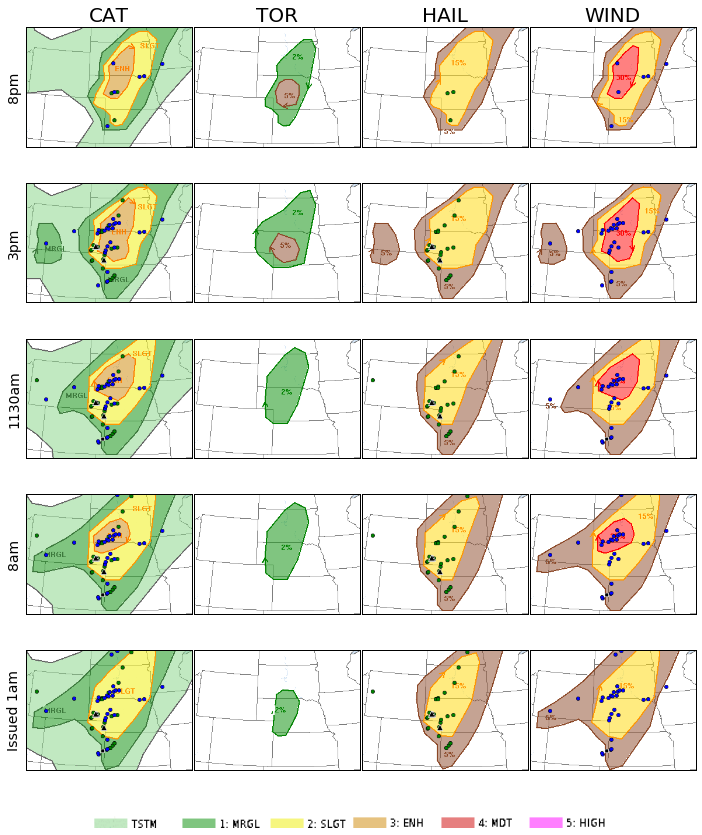

In [16]:
img_locations = [] #prob also
for i in range(0,npanels*4):
    img_locations.append(dr[i]+yr[i]+out[i]+ltim[i]+pt[i]+ext[i]+".gif")
print(img_locations[0])
# 14,6
fig = figure(figsize=(12,12)) #choose wisely otherwise you bake in x-axis whitespace
#loop through all file locations
for i in range(len(img_locations)):
    ##read in image
    try:
        img_data = urllib2.urlopen(img_locations[i]).read()
    except:
        img_data = 0
    if img_data != 0:
        img = Image.open(StringIO(img_data))
        if i == 0: imga = img
        #cropping
        width, height = img.size   # Get dimensions
        #print(img.size)
        region = 'M'
        # focus on the southeast region ;; need a function for this
        if region == 'SE':
            xx = 5
            yy = 2
            xy = 5
        elif region == 'CE':
            xx = 5
            yy = 2#1 1.75
            xy = 4#4 3.5
        else:
            yy = 1.25
            xy = 3.
            ya = .9
            xa = 2.75
            
            
        if yy >= xy: print('Wrong:')
        left = int(yy*width/xx)
        top = int(ya*height/xx)
        right = int(xy*width/xx)
        bottom = int(xa*height/xx)
        
        #print(left,top,right,bottom)
        imgcrop = img.crop((left, top, right, bottom))
        ##set current subplot to i
        ##subplot shape will be in this case
        ##(2,2,i) where i is the current subplot
        ax = plt.subplot(npanels,len(img_locations)/npanels,i+1)
        ##show image
        plt.imshow(imgcrop)#,vmin=0,vmax=16)
        if i < 4:
            plt.title(titles[i],fontsize=20)
        #for k,q in enumerate([tblCat,tblTorn,tblHail,tblWind]):
        #    if k == 0: cat = 'cats'
        #    if k == 1: cat = 'torn'
        #    if k == 2: cat = 'hail'
        #    if k == 3: cat = 'wind'
            
        if i == 0:
            ylabel(ylabels[0],fontsize=14)
        elif i == 4:
            ylabel(ylabels[1],fontsize=14)
        elif i == 8:
            ylabel(ylabels[2],fontsize=14)
        elif i == 12:
            ylabel(ylabels[3],fontsize=14)
        elif i == 16:
            ylabel(ylabels[4],fontsize=14)
        #ax.text(0.025,0.875,titles[i],fontsize=13,transform=ax.transAxes)
        #ax.axis('off')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax = plt.subplot(npanels,4,i+1)
        ax.text(0,0.7,'Missing',fontsize=20,transform=ax.transAxes)
        ax.axis('off')
        print('Missing: ',titles[i])
#plt.tight_layout(pad=.5, h_pad=None, w_pad=None, rect=None)
plt.subplots_adjust(wspace=0.01, hspace=0.01, top=1, bottom=0.1)
#zoom on the legend and put in on here new axes instance
if zoom:
    axa = fig.add_axes([0.2, 0.01, 0.3, 0.1])
    imgcrop = imga.crop((int(.7*width), int(.9475*height),int(.99*width) , int(.9675*height)))
    plt.imshow(imgcrop)#,vmin=0,vmax=16)
    axb = fig.add_axes([0.5, 0.01, 0.3, 0.1])
    imgcrop = imga.crop((int(.7*width), int(.975*height),int(.99*width) , int(.995*height)))
    plt.imshow(imgcrop)#,vmin=0,vmax=16)
    axa.set_yticklabels([])
    axa.set_xticklabels([])
    axa.set_xticks([])
    axa.set_yticks([])
    axb.set_yticklabels([])
    axb.set_xticklabels([])
    axb.set_xticks([])
    axb.set_yticks([])
    axa.axis('off')
    axb.axis('off')
savefig(ltim[0]+"_D1v.png",dpi=300,bbox_inches="tight")

# how we got to today or yesterday when verif is around

In [141]:
today = True
if today:
    dd = datetime.utcnow() #.strftime('%Y%m%d')
    ac = datetime.utcnow().strftime('%H%M')
    yy = datetime.utcnow().strftime('%Y')
    cc = datetime.utcnow() + timedelta(hours=48)
    c = cc.strftime('%A')
    dda = datetime.utcnow() + timedelta(hours=72)
    d = dda.strftime('%A')
else:
    dd = datetime.utcnow() - timedelta(hours=24)
    ac = dd.strftime('%H%M')
    yy = dd.strftime('%Y')
    cc = datetime.utcnow() + timedelta(hours=24)
    c = cc.strftime('%A')
    dda = datetime.utcnow() + timedelta(hours=48)
    d = dda.strftime('%A')
print(dd)
ltim = []
yr = []
for h in [0,0,0,0,24,48,72,96,120]:
    ddb = dd - timedelta(hours=h)
    ltim.append(ddb.strftime('%Y%m%d'))
    yr.append(ddb.strftime('%Y'))

print(len(ltim),len(yr))

if float(ac) >= 600 and float(ac) < 1200:
    aa = '1200'
    bb = '1730'
elif float(ac) >= 1200 and float(ac) < 1555:
    aa = '1300'
    bb = '1730'
elif float(ac) >= 1555 and float(ac) < 1630:
    aa = '1630'
    bb = '1730'
elif float(ac) >= 1630 and float(ac) < 2000:
    aa = '1630'
    bb = '1730'
elif float(ac) >= 2000:
    aa = '2000'
    bb = '1730'
else:
    aa = '0100'
    bb = '1730'
print(dd,ac,aa)
titles = ['Day1_'+aa,'Day1_'+aa,'Day1_'+aa,'Day1_'+aa,'Day2_'+bb,'Day3','Day4','Day5']
labels = ['Today','Tomorrow',c,d]
labels = ['Cat','TOR','Cat','Cat','Prob','Prob','Prob','Prob','Prob']
labels = ['Cat','TOR','HAIL','WIND','Cat','Cat','Prob','Prob','Prob','Prob','Prob']
#labels = ['Cat','HAIL','Cat','Cat','Prob','Prob','Prob','Prob','Prob']
if today:
    out = ["/day1otlk_","/day1probotlk_","/day1probotlk_","/day1probotlk_","/day2otlk_","/day3otlk_","/day4prob_","/day5prob_","/day6prob_","/day7prob_","/day8prob_"]
    pt = ["_"+aa,"_"+aa,"_"+aa,"_"+aa,"_"+bb,'_0730',"_1200","_1200","_1200","_1200","_1200","_1200"]
else:
    #out = ["/day1otlk_v_","/day1probotlk_v_","/day2otlk_","/day3otlk_","/day4prob_","/day5prob_","/day6prob_","/day7prob_","/day8prob_"]
    out = ["/day1otlk_v_","/day1probotlk_v_","/day1probotlk_v_","/day1probotlk_v_","/day2otlk_","/day3otlk_","/day4prob_","/day5prob_","/day6prob_","/day7prob_","/day8prob_"]
    pt = ["_"+aa,"_"+aa,"_"+aa,"_"+aa,'_'+bb,'_0730',"_1200","_1200","_1200","_1200","_1200","_1200"]
ext = ['','_torn_prt','_hail_prt','_wind_prt','','','','','','','','']
#ext = ['','_hail_prt','','','','','','','','','','']
pt = ["_"+aa,"_"+aa,"_"+aa,"_"+aa,'_'+bb,'_0730',"_1200","_1200","_1200","_1200","_1200","_1200"]
dn = "http://www.spc.noaa.gov/products/exper/day4-8/archive/"
dm = "http://www.spc.noaa.gov/products/outlook/archive/"
dr = [dm,dm,dm,dm,dm,dm,dn,dn]

print(len(ltim),len(yr),len(titles))
print(len(out),len(ext),len(pt),len(dr))

2016-06-25 13:58:17.444367
9 9
2016-06-25 13:58:17.444367 1358 1300
9 9 8
11 12 12 8


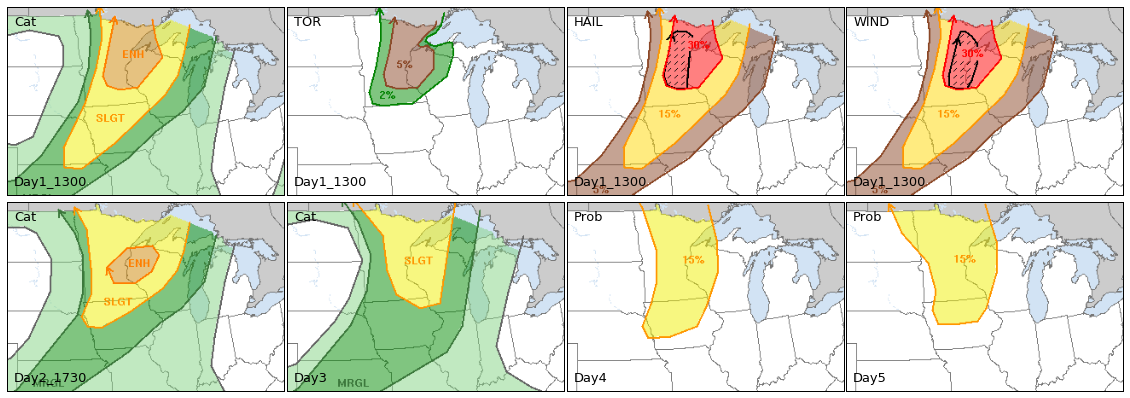

In [142]:
img_locations = [] #prob also
for i in range(0,len(dr)):
    img_locations.append(dr[i]+yr[i]+out[i]+ltim[i]+pt[i]+ext[i]+".gif")
#print(img_locations)

fig = figure(figsize=(20,6)) #choose wisely otherwise you bake in x-axis whitespace
zoom = True

#loop through all file locations
for i in range(len(img_locations)):
    ##read in image
    try:
        img_data = urllib2.urlopen(img_locations[i]).read()
    except:
        img_data = 0
    if img_data != 0:
        img = Image.open(StringIO(img_data))
        #cropping
        width, height = img.size   # Get dimensions
        #print(img.size)
        region = 'M'
        # focus on the southeast region ;; need a function for this
        if region == 'SE':
            xx = 5
            yy = 2
            xy = 5
            yx = 1
            xa = 4.15
        elif region == 'CE':
            xx = 5
            yy = 1.75#1
            xy = 4.
            yx = 1.5
            xa = 4.25
        elif region == 'CE2':
            xx = 5
            yy = 2#1
            xy = 4.2
            yx = 1.2
            xa = 4.15
        else:
            xx = 5
            yy = 2.
            xy = 4.
            yx = .5
            xa = 2.5
        if yy >= xy: print('Wrong:')
        left = int(yy*width/xx)
        top = int(yx*height/xx)
        right = int(xy*width/xx)
        bottom = int(xa*height/xx)
        #print(left,top,right,bottom)
        if zoom:
            imgcrop = img.crop((left, top, right, bottom))
        else:
            imgcrop = img
        ##set current subplot to i
        ##subplot shape will be in this case
        ##(2,2,i) where i is the current subplot
        ax = plt.subplot(2,len(img_locations)/2,i+1)
        ##show image
        plt.imshow(imgcrop)#,vmin=0,vmax=16)
        #if i < 4:
        #plt.title(labels[i],fontsize=20)
        if i == 0:
            ylabel('',fontsize=14)
        elif i == 3:
            ylabel('',fontsize=14)
        elif i == 6:
            ylabel('',fontsize=14)
        ax.text(0.025,0.05,titles[i],fontsize=13,transform=ax.transAxes)
        ax.text(0.025,0.90,labels[i],fontsize=13,transform=ax.transAxes)
        #ax.axis('off')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax = plt.subplot(2,4,i+1)
        ax.text(0,0.7,'Missing',fontsize=20,transform=ax.transAxes)
        ax.axis('off')
        print('Missing: ',titles[i],img_locations[i])
#plt.tight_layout(pad=.5, h_pad=None, w_pad=None, rect=None)
plt.subplots_adjust(wspace=0.01, hspace=0.01, top=1, bottom=0.1)
savefig(ltim[0]+"e.png",dpi=300,bbox_inches="tight")

# how we got to tomorrow, today

In [171]:
dd = datetime.utcnow().strftime('%Y%m%d')
ac = datetime.utcnow().strftime('%H%M')
yy = datetime.utcnow().strftime('%Y')
ltim = []
yr = []
opt = [0,0,24,48,72,96]
for h in opt:
    ddb = datetime.utcnow() - timedelta(hours=h)
    ltim.append(ddb.strftime('%Y%m%d'))
    yr.append(ddb.strftime('%Y'))
    
cc = datetime.utcnow() + timedelta(hours=48)
c = cc.strftime('%A')
dd = datetime.utcnow() + timedelta(hours=72)
d = dd.strftime('%A')
print(len(ltim),len(yr))

if float(ac) >= 600 and float(ac) < 1255:
    aa = '1200'
    bb = '1730'
elif float(ac) >= 1255 and float(ac) < 1630:
    aa = '0600'
    bb = '1730'
elif float(ac) >= 1630 and float(ac) < 2000:
    aa = '1730'
    bb = '0600'
elif float(ac) >= 2000:
    aa = '2000'
    bb = '1730'
else:
    aa = '0100'
    bb = '1730'
print(dd,ac,aa)
titles = ['Day2_'+aa,'Day2_'+bb,'Day3','Day4','Day5','Day6']
#labels = ['Today','Tomorrow',c,d]
labels = ['Cat','Cat','Cat','Prob','Prob','Prob']
#labels = ['Cat','HAIL','Cat','Cat','Prob','Prob','Prob','Prob','Prob']
out = ["/day2otlk_","/day2otlk_","/day3otlk_","/day4prob_","/day5prob_","/day6prob_"]
ext = ['','','','','','']
#ext = ['','_hail_prt','','','','','','','','','','']
pt = ["_"+aa,'_'+bb,'_0730',"_1200","_1200","_1200"]
dn = "http://www.spc.noaa.gov/products/exper/day4-8/archive/"
dm = "http://www.spc.noaa.gov/products/outlook/archive/"
dr = [dm,dm,dm,dn,dn,dn]

print(len(ltim),len(yr),len(titles))
print(len(out),len(ext),len(pt),len(dr))

6 6
2016-05-09 18:02:06.231249 1802 1730
6 6 6
6 6 6 6


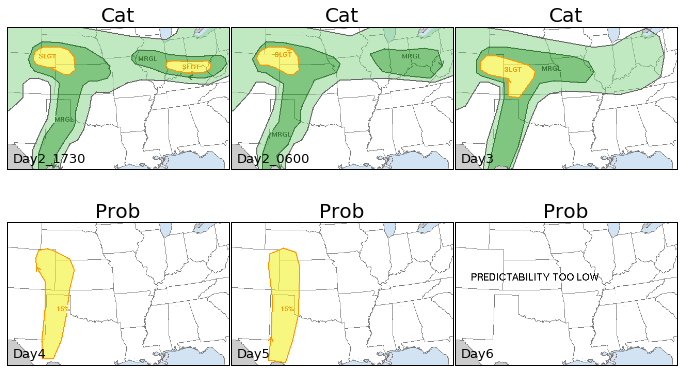

In [176]:
img_locations = [] #prob also
for i in range(0,len(dr)):
    img_locations.append(dr[i]+yr[i]+out[i]+ltim[i]+pt[i]+ext[i]+".gif")
#print(img_locations)

fig = figure(figsize=(12,6)) #choose wisely otherwise you bake in x-axis whitespace
zoom = True

#loop through all file locations
for i in range(len(img_locations)):
    ##read in image
    try:
        img_data = urllib2.urlopen(img_locations[i]).read()
    except:
        img_data = 0
    if img_data != 0:
        img = Image.open(StringIO(img_data))
        #cropping
        width, height = img.size   # Get dimensions
        #print(img.size)
        region = 'M'
        # focus on the southeast region ;; need a function for this
        if region == 'SE':
            xx = 5
            yy = 2
            xy = 5
            yx = 1
            xa = 4.15
        elif region == 'CE':
            xx = 5
            yy = 1.75#1
            xy = 4.
            yx = 1.5
            xa = 4.25
        elif region == 'CE2':
            xx = 5
            yy = 2#1
            xy = 4.2
            yx = 1.2
            xa = 4.15
        else:
            xx = 5
            yy = 1.5
            xy = 4.15
            yx = 1.5
            xa = 4.
        if yy >= xy: print('Wrong:')
        left = int(yy*width/xx)
        top = int(yx*height/xx)
        right = int(xy*width/xx)
        bottom = int(xa*height/xx)
        #print(left,top,right,bottom)
        if zoom:
            imgcrop = img.crop((left, top, right, bottom))
        else:
            imgcrop = img
        ##set current subplot to i
        ##subplot shape will be in this case
        ##(2,2,i) where i is the current subplot
        ax = plt.subplot(2,3,i+1)
        ##show image
        plt.imshow(imgcrop)#,vmin=0,vmax=16)
        #if i < 4:
        plt.title(labels[i],fontsize=20)
        if i == 0:
            ylabel('',fontsize=14)
        elif i == 3:
            ylabel('',fontsize=14)
        elif i == 6:
            ylabel('',fontsize=14)
        ax.text(0.025,0.05,titles[i],fontsize=13,transform=ax.transAxes)
        #ax.axis('off')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax = plt.subplot(2,3,i+1)
        ax.text(0,0.7,'Missing',fontsize=20,transform=ax.transAxes)
        ax.axis('off')
        print('Missing: ',titles[i],img_locations[i])
#plt.tight_layout(pad=.5, h_pad=None, w_pad=None, rect=None)
plt.subplots_adjust(wspace=0.01, hspace=0.01, top=1, bottom=0.1)
savefig(ltim[0]+"e.png",dpi=300,bbox_inches="tight")

# how we got to today in archive mode

In [120]:
dd = datetime.utcnow().strftime('%Y%m%d')
ac = datetime.utcnow().strftime('%H%M')
yy = datetime.utcnow().strftime('%Y')
dd = '20160508'
ac = '2000'
yy = '2016'
ltim = []
yr = []
opt = [0,0,24,48,72,96,120,144,168]
for h in opt:
    ddb = datetime.strptime(dd+ac, '%Y%m%d%H%M') - timedelta(hours=h)
    ltim.append(ddb.strftime('%Y%m%d'))
    yr.append(ddb.strftime('%Y'))
    
cc = datetime.strptime(dd+ac, '%Y%m%d%H%M') + timedelta(hours=48)
c = cc.strftime('%A')
dd = datetime.strptime(dd+ac, '%Y%m%d%H%M') + timedelta(hours=72)
d = dd.strftime('%A')
print(len(ltim),len(yr))

if float(ac) >= 600 and float(ac) < 1255:
    aa = '1200'
    bb = '1730'
elif float(ac) >= 1255 and float(ac) < 1630:
    aa = '1300'
    bb = '1730'
elif float(ac) >= 1630 and float(ac) < 2000:
    aa = '1630'
    bb = '1730'
elif float(ac) >= 2000:
    aa = '2000'
    bb = '1730'
else:
    aa = '0100'
    bb = '1730'
print(dd,ac,aa)
titles = ['Day1_'+aa,'Day1_'+aa,'Day2_'+bb,'Day3','Day4','Day5','Day6','Day7','Day8']
#labels = ['Today','Tomorrow',c,d]
labels = ['Cat','TOR','Cat','Cat','Prob','Prob','Prob','Prob','Prob']
#labels = ['Cat','HAIL','Cat','Cat','Prob','Prob','Prob','Prob','Prob']
out = ["/day1otlk_","/day1probotlk_","/day2otlk_","/day3otlk_","/day4prob_","/day5prob_","/day6prob_","/day7prob_","/day8prob_"]
ext = ['','_torn_prt','','','','','','','','','','']
#ext = ['','_hail_prt','','','','','','','','','','']
pt = ["_"+aa,"_"+aa,'_'+bb,'_0730',"_1200","_1200","_1200","_1200","_1200","_1200"]
dn = "http://www.spc.noaa.gov/products/exper/day4-8/archive/"
dm = "http://www.spc.noaa.gov/products/outlook/archive/"
dr = [dm,dm,dm,dm,dn,dn,dn,dn,dn]

print(len(ltim),len(yr),len(titles))
print(len(out),len(ext),len(pt),len(dr))

9 9
2016-05-11 20:00:00 2000 2000
9 9 9
9 12 10 9


In [71]:
#how we got to today
dd = datetime.utcnow().strftime('%Y%m%d')
ac = datetime.utcnow().strftime('%H%M')
yy = datetime.utcnow().strftime('%Y')
ltim = []
yr = []
opt = [0,0,24,48,72,96,120,144,168]
for h in opt:
    ddb = datetime.utcnow() - timedelta(hours=h)
    ltim.append(ddb.strftime('%Y%m%d'))
    yr.append(ddb.strftime('%Y'))
    
cc = datetime.utcnow() + timedelta(hours=48)
c = cc.strftime('%A')
dd = datetime.utcnow() + timedelta(hours=72)
d = dd.strftime('%A')
print(len(ltim),len(yr))

if float(ac) >= 600 and float(ac) < 1255:
    aa = '1200'
    bb = '1730'
elif float(ac) >= 1255 and float(ac) < 1630:
    aa = '1300'
    bb = '1730'
elif float(ac) >= 1630 and float(ac) < 2000:
    aa = '1630'
    bb = '1730'
elif float(ac) >= 2000:
    aa = '2000'
    bb = '1730'
else:
    aa = '0100'
    bb = '1730'
print(dd,ac,aa)
titles = ['Day1_'+aa,'Day1_'+aa,'Day2_'+bb,'Day3','Day4','Day5','Day6','Day7','Day8']
#labels = ['Today','Tomorrow',c,d]
labels = ['Cat','TOR','Cat','Cat','Prob','Prob','Prob','Prob','Prob']
#labels = ['Cat','HAIL','Cat','Cat','Prob','Prob','Prob','Prob','Prob']
out = ["/day1otlk_","/day1probotlk_","/day2otlk_","/day3otlk_","/day4prob_","/day5prob_","/day6prob_","/day7prob_","/day8prob_"]
ext = ['','_torn_prt','','','','','','','','','','']
#ext = ['','_hail_prt','','','','','','','','','','']
pt = ["_"+aa,"_"+aa,'_'+bb,'_0730',"_1200","_1200","_1200","_1200","_1200","_1200"]
dn = "http://www.spc.noaa.gov/products/exper/day4-8/archive/"
dm = "http://www.spc.noaa.gov/products/outlook/archive/"
dr = [dm,dm,dm,dm,dn,dn,dn,dn,dn]

print(len(ltim),len(yr),len(titles))
print(len(out),len(ext),len(pt),len(dr))

9 9
2016-04-29 13:03:11.753615 1303 1300
9 9 9
9 12 10 9


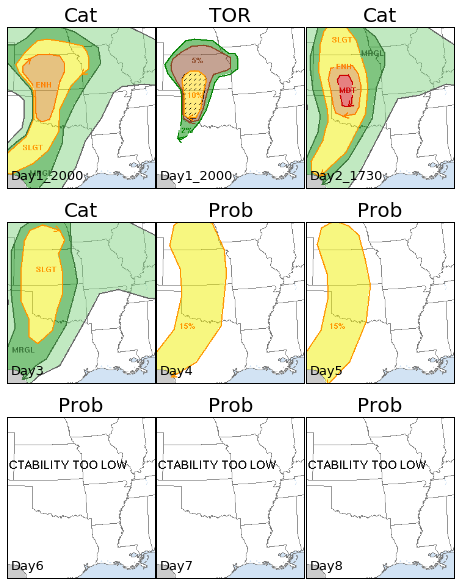

In [121]:
img_locations = [] #prob also
for i in range(0,len(dr)):
    img_locations.append(dr[i]+yr[i]+out[i]+ltim[i]+pt[i]+ext[i]+".gif")
#print(img_locations)

fig = figure(figsize=(8,9)) #choose wisely otherwise you bake in x-axis whitespace
zoom = True

#loop through all file locations
for i in range(len(img_locations)):
    ##read in image
    try:
        img_data = urllib2.urlopen(img_locations[i]).read()
    except:
        img_data = 0
    if img_data != 0:
        img = Image.open(StringIO(img_data))
        #cropping
        width, height = img.size   # Get dimensions
        #print(img.size)
        region = 'M'
        # focus on the southeast region ;; need a function for this
        if region == 'SE':
            xx = 5
            yy = 2
            xy = 5
            yx = 1
            xa = 4.15
        elif region == 'CE':
            xx = 5
            yy = 1.75#1
            xy = 4.
            yx = 1.5
            xa = 4.25
        elif region == 'CE2':
            xx = 5
            yy = 2#1
            xy = 4.2
            yx = 1.2
            xa = 4.15
        else:
            xx = 5
            yy = 2.0
            xy = 3.5
            yx = 1.75
            xa = 4.15
        if yy >= xy: print('Wrong:')
        left = int(yy*width/xx)
        top = int(yx*height/xx)
        right = int(xy*width/xx)
        bottom = int(xa*height/xx)
        #print(left,top,right,bottom)
        if zoom:
            imgcrop = img.crop((left, top, right, bottom))
        else:
            imgcrop = img
        ##set current subplot to i
        ##subplot shape will be in this case
        ##(2,2,i) where i is the current subplot
        ax = plt.subplot(3,len(img_locations)/3,i+1)
        ##show image
        plt.imshow(imgcrop)#,vmin=0,vmax=16)
        #if i < 4:
        plt.title(labels[i],fontsize=20)
        if i == 0:
            ylabel('',fontsize=14)
        elif i == 3:
            ylabel('',fontsize=14)
        elif i == 6:
            ylabel('',fontsize=14)
        ax.text(0.025,0.05,titles[i],fontsize=13,transform=ax.transAxes)
        #ax.axis('off')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax = plt.subplot(3,3,i+1)
        ax.text(0,0.7,'Missing',fontsize=20,transform=ax.transAxes)
        ax.axis('off')
        print('Missing: ',titles[i],img_locations[i])
#plt.tight_layout(pad=.5, h_pad=None, w_pad=None, rect=None)
plt.subplots_adjust(wspace=0.01, hspace=0.01, top=1, bottom=0.1)
savefig(ltim[0]+"e.png",dpi=300,bbox_inches="tight")